importing libraries and models

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
# Importing the Coefficient of determination
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
# Importing Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Importing Lasso & Ridge & Bayesian Ridge
from sklearn.linear_model import Lasso, Ridge, BayesianRidge
# Importing KNN
from sklearn.neighbors import KNeighborsRegressor
# Importing SVM
from sklearn.svm import SVR
# Importing MLP
from sklearn.neural_network import MLPRegressor
# Importing Random Forest & Gradient Boosting Regressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
# Importing training & testing models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

Performing EDA

In [17]:
dataset = pd.read_csv('records.csv')
result = pd.read_csv('results.csv').to_numpy()
X, y = dataset, result.ravel()
print(y.shape)
print(X.shape)
X.describe()

(170,)
(170, 4)


,Animal Products,Cereals - Excluding Beer,Obesity,Vegetal Products
count,170.000000,170.000000,170.000000,170.000000
mean,20.695714,4.376548,18.377647,29.304396
std,8.002713,3.183815,9.862101,8.002369
min,5.018200,0.990800,0.000000,13.098200
25%,14.885800,1.970150,8.200000,23.133050
50%,20.943050,3.306750,20.700000,29.060600
75%,26.866950,5.587600,25.700000,35.117250
max,36.901800,18.376300,45.600000,44.981800


<AxesSubplot:>

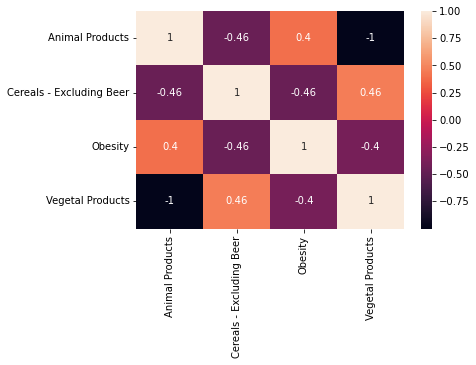

In [18]:
sns.heatmap(X.corr(), annot=True)

Because there is multi-colinearity, we will remove the 4th Col from Data

In [19]:
X = X.iloc[:, 0:3]
print(X.head())

   Animal Products  Cereals - Excluding Beer  Obesity
0          21.6397                    8.0353      4.5
1          32.0002                    2.6734     22.3
2          14.4175                    4.2035     26.6
3          15.3041                    6.5545      6.8
4          27.7033                    3.2153     19.1


Set train and test sizes

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

creating the evaluation_model function with the Coefficient of determination

In [21]:
def eval_model(model):
    mean_abs_error=mean_absolute_error(y_test,model.predict(X_test))
    mean_square_error=mean_squared_error(y_test,model.predict(X_test))
    r2_error=r2_score(y_test,model.predict(X_test))

    print(f'Mean absolute error : {mean_abs_error}')
    print(f'Mean squared error : {mean_square_error}')
    print(f'R2 score : {r2_error}')

Decision tree

In [22]:
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X,y)
y_pred = regr.predict(X_test)
print("Evaluating Decision tree model :")
eval_model(regr)

Evaluating Decision tree model :
Mean absolute error : 0.04138705117647059
Mean squared error : 0.0038557427356763255
R2 score : -0.7987139794482634


Lasso

In [23]:
#Create linear regression object
regr = Lasso()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("Evaluating Lasso model :")
eval_model(regr)

Evaluating Lasso model :
Mean absolute error : 0.03847743185596886
Mean squared error : 0.002162057016120683
R2 score : -0.008605201606721513


Ridge

In [24]:
#Create linear regression object
regr = Ridge()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("Evaluating BayesianRidge model :")
eval_model(regr)

Evaluating BayesianRidge model :
Mean absolute error : 0.032492456592651424
Mean squared error : 0.0015845280417253927
R2 score : 0.26081356177947534


Bayesian Ridge

In [25]:
#Create linear regression object
regr = BayesianRidge()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("Evaluating BayesianRidge model :")
eval_model(regr)

Evaluating BayesianRidge model :
Mean absolute error : 0.03239062327217962
Mean squared error : 0.0015749892692064286
R2 score : 0.2652634238820174


KNN

In [26]:
regr = KNeighborsRegressor(n_neighbors=3)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("Evaluating KNN model :")
eval_model(regr)


Evaluating KNN model :
Mean absolute error : 0.035126137921568636
Mean squared error : 0.0024906324334593526
R2 score : -0.1618864853919697


SVM

In [27]:
regr = SVR(C=10)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("Evaluating SVM model :")
eval_model(regr)

Evaluating SVM model :
Mean absolute error : 0.062316972235294116
Mean squared error : 0.0047750787519643895
R2 score : -1.2275866137677207


MLP

In [28]:
regr = MLPRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("Evaluating MLP model :")
eval_model(regr)

Evaluating MLP model :
Mean absolute error : 0.056376898557502324
Mean squared error : 0.0043165218373740965
R2 score : -1.0136686246305264


Random Forest

In [29]:
regr = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("Evaluating Random forest model :")
eval_model(regr)

Evaluating Random forest model :
Mean absolute error : 0.030705281115294105
Mean squared error : 0.0014390171023605542
R2 score : 0.32869479212620745


Gradient Boosting Regressor

In [30]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    
}

regr = GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("Evaluating Gradient Boosting model :")
eval_model(regr)

Evaluating Gradient Boosting model :
Mean absolute error : 0.030681968560580822
Mean squared error : 0.0013783119345756754
R2 score : 0.3570139102325821
